## Percolating Edges of the Network and activity based results.

### This notebook simulates the activity as we remove edges from cells uniformly randomly for each edge.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing

import nngt
import nest
nngt.set_config('with_nest', True)
import nngt.simulation as ns
from pathlib import Path
import networkx as nx

from modules import simulation as nsim
from modules import percolation as per
from modules import analysis

from importlib import reload
#reload(nsim)
#reload(per)
reload(analysis)

<module 'modules.analysis' from '/home/ele/Moshir/modules/analysis.py'>

In [2]:
num_omp = multiprocessing.cpu_count() #Number of cores on the system

# network Parameters
w = 50.
ds = 0.01
do = 2.
deg = 50.
N = 500
l = 50.
R = 1000

from fromMallory.Neurons_Parameters import di_RS

params = di_RS
params['nb_neurons'] = N
print(params)

{'w': 37.0, 'V_m': -51.0, 'E_L': -70.0, 'I_e': 262.0, 'g_L': 12.01, 'C_m': 200.0, 'a': 2.0, 'V_th': -50.0, 'V_reset': -48.0, 'Delta_T': 1.8, 'b': 70.0, 'tau_w': 300.0, 'V_peak': 30.0, 'tau_syn_ex': 0.2, 't_ref': 2.0, 'nb_neurons': 500}


In [3]:
%%capture out1

params['nb_neurons'] = N

net = nsim.Make_Network(None, num_omp = num_omp, culture_radius = R, num_neurons = N, \
                        avg_deg = deg, lambda_edr = l, delay_slope = ds, delay_offset = do, syn_weight = w,\
                        neuron_params = {'neuron' : params}, plot_degrees=False, plot_delays=False)

frac,scc,deg,ending,gc,BP = analysis.percolation_netw_statistics(net, method_removal='uniform', spacing=0.01, lspac=250, starting=0.70,\
                                params=params, plot_ssc=True, plot_gc=True, activity = True, plot_activity = False)

Making Network


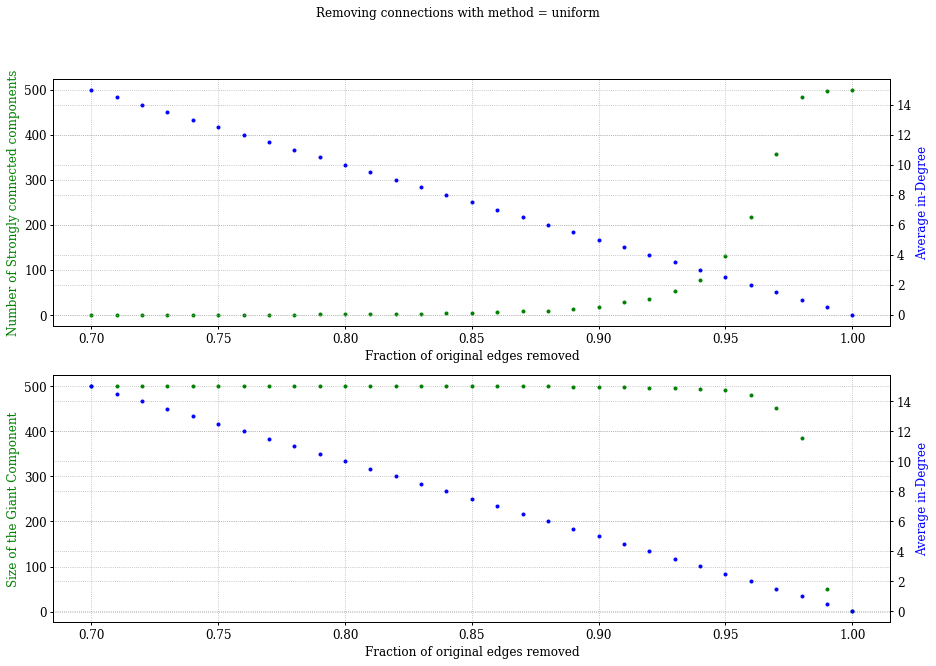

In [4]:
out1.show()

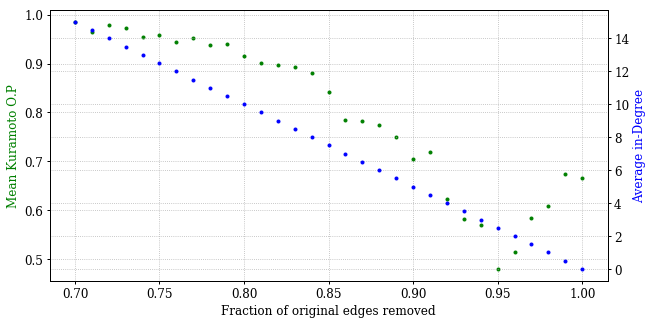

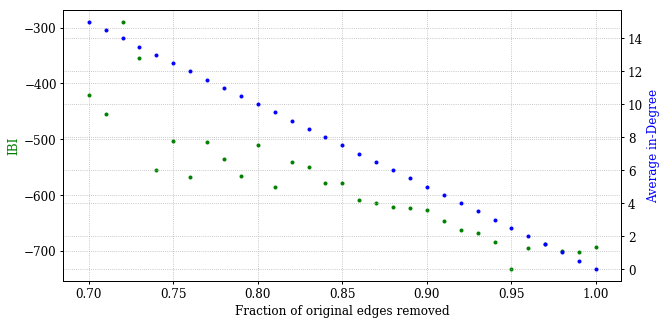

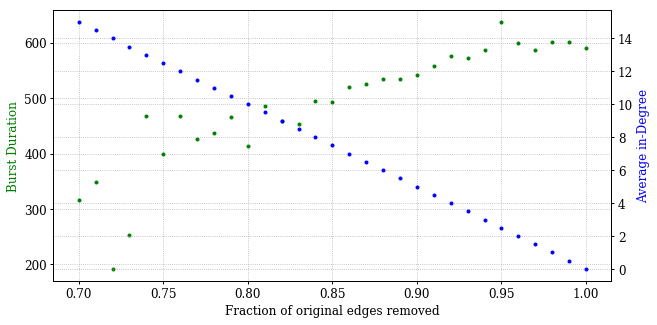

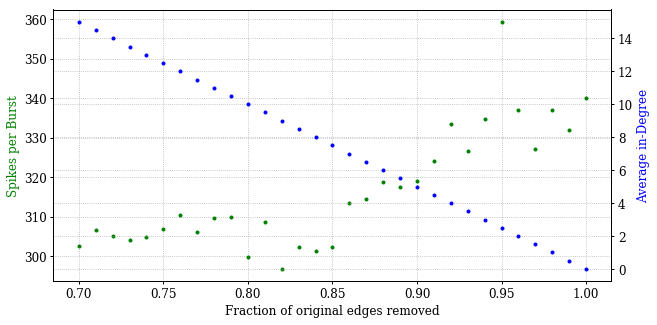

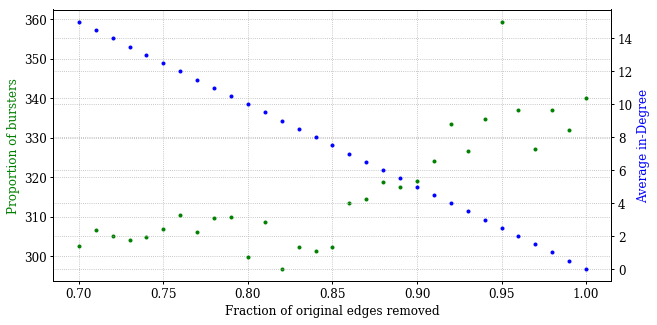

In [5]:
analysis.plot_activity_properties(frac,scc,deg,ending,gc,BP)